# ***Data Mining* pada Data *Campus Recruitment* Kaggle**

*Mata kuliah Data Mining Universitas Indonesia*

* Alva Andhika Sa'id (1706031166)
* Farhan Alfarizi (1706031531)
* M. Ibnu Ridho (17)
* M. Ilham Randi (17)

Kontribusi kelompok:
* Alva: melakukan klasifikasi, membuat ppt klasifikasi
* Farhan: melakukan preprocessing data, membuat ppt pengenalan data, menyatukan ppt
* Ilham: melakukan visualisasi, membuat ppt visualisasi
* Ibnu: melakukan clustering, membuat ppt clustering

Presentasi dilakukan bersama dan semua materi dipelajari bersama-sama

# Import Module

In [ ]:
#Import Module
import warnings; warnings.simplefilter('ignore')
import umap, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()
import os
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import scipy
from scipy import stats
from sklearn.preprocessing import StandardScaler

sns.set(style="ticks", color_codes=True)
plt.style.use('bmh'); sns.set()

# Exploratory Data Analysis

## Data Preprocessing

### Pengenalan Data

In [ ]:
import shutil
import os
from pathlib import Path
import pandas as pd

!wget -O Placement_Data_Full_Class.csv https://www.dropbox.com/s/4jgeh38nisdsxrb/Placement_Data_Full_Class.csv?dl=0
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

--2021-01-06 09:59:12--  https://www.dropbox.com/s/4jgeh38nisdsxrb/Placement_Data_Full_Class.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/4jgeh38nisdsxrb/Placement_Data_Full_Class.csv [following]
--2021-01-06 09:59:12--  https://www.dropbox.com/s/raw/4jgeh38nisdsxrb/Placement_Data_Full_Class.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9c12abacc9292d6c78530a0a8c.dl.dropboxusercontent.com/cd/0/inline/BGeJhSif1QMy-gl8fGsugbyXltOrTMk1ZkI8CmlWxbD-M4PPsc4a26AGYfeiAvzZhKgNCWj71qEja0R9STrMosBeIuPCpNs1TMuUDkLTrXCFNzCTzJW4NCKrrOGh3J4MLkk/file# [following]
--2021-01-06 09:59:12--  https://uc9c12abacc9292d6c78530a0a8c.dl.dropboxusercontent.com/cd/0/inline/BGeJhSif1QMy-gl8fGsugbyXltOrTMk1ZkI8CmlWxbD-M4PPsc4a

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
print(type(df)) #Data penelitian terdiri atas 215 baris dan 15 kolom
r,c=df.shape
"Jumlah baris=",r,"Jumlah kolom=",c

<class 'pandas.core.frame.DataFrame'>


('Jumlah baris=', 215, 'Jumlah kolom=', 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

Berikut adalah penjelasan setiap variabel

*   ssc_p = Persentase nilai Secondary Education 10th grade
*   ssc_b = Board Secondary Education 10th grade
*   hsc_p = Persentase nilai Higher Secondary Edu 12th grade
*   hsc_b = Board Higher Secondary Edu 12th grade
*   hsc_s = Peminatan saat 12th grade
*   degree_p = Persentase Nilai Undergraduate Education
*   degree_t = Jurusan Undergraduate Education
*   workex = Pengalaman Kerja
*   etest_p = Persentase Nilai Employment Test oleh kampus
*   specialisation = Jurusan saat Master Business Academy
*   mba_p = Persentase Nilai Master Business Academy
* salary = Gaji
* status = Diterima kerja atau belum


### Pengecekan Missing Value

In [ ]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [ ]:
df[df['status']=='Not Placed']

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


terlihat bahwa missing value pada variabel 'salary' adalah untuk mahasiswa - mahasiswa yang belum ditempatkan/diterima kerja di manapun. 

### Pengolahan Data

Membuang variabel yang tidak dibutuhkan

In [ ]:
df.drop('sl_no', axis=1, inplace=True)

In [ ]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
#Mengubah tipe variabel 'object' menjadi 'category'
df["gender"] = df["gender"].astype('category')
df["ssc_b"] = df["ssc_b"].astype('category')
df["hsc_b"] = df["hsc_b"].astype('category')
df["hsc_s"] = df["hsc_s"].astype('category')
df["degree_t"] = df["degree_t"].astype('category')
df["workex"] = df["workex"].astype('category')
df["specialisation"] = df["specialisation"].astype('category')
df["status"] = df["status"].astype('category')

In [ ]:
df.dtypes

gender            category
ssc_p              float64
ssc_b             category
hsc_p              float64
hsc_b             category
hsc_s             category
degree_p           float64
degree_t          category
workex            category
etest_p            float64
specialisation    category
mba_p              float64
status            category
salary             float64
dtype: object

In [ ]:
df['salary'] = df['salary'].fillna(0)
df['salary'].describe()

count       215.000000
mean     198702.325581
std      154780.926716
min           0.000000
25%           0.000000
50%      240000.000000
75%      282500.000000
max      940000.000000
Name: salary, dtype: float64

### Memisahkan Variabel Tertentu

In [ ]:
# Memilih hanya variable numerik
df_num = df.select_dtypes(include = ['float64'])
df_num.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.0
1,79.33,78.33,77.48,86.5,66.28,200000.0
2,65.00,68.00,64.00,75.0,57.80,250000.0
3,56.00,52.00,52.00,66.0,59.43,0.0
4,85.80,73.60,73.30,96.8,55.50,425000.0


In [ ]:
# Memilih hanya variable kategorik
df_cat = df.select_dtypes(include = ['category'])
df_cat.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed


In [ ]:
kat = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status']
for i in kat:
  print(i +'\n')
  print(df[i].value_counts())
  print('\n')

gender

M    139
F     76
Name: gender, dtype: int64


ssc_b

Central    116
Others      99
Name: ssc_b, dtype: int64


hsc_b

Others     131
Central     84
Name: hsc_b, dtype: int64


hsc_s

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64


degree_t

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64


workex

No     141
Yes     74
Name: workex, dtype: int64


specialisation

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64


status

Placed        148
Not Placed     67
Name: status, dtype: int64




### Membuat Variabel Dummy

In [ ]:
for i in kat:
  dff = pd.get_dummies(df[i])
  df = pd.concat([df, dff], axis = 1)
df.head()


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,F,M,Central,Others,Central,Others,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech,No,Yes,Mkt&Fin,Mkt&HR,Not Placed,Placed
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1


In [ ]:
#Base label 1
# Gender : Male
# ssc_b : Central
# hsc_b : Central
# workex : Yes
# specialisation : mkt&fin
# status: Placed: 1

#Base label 0
# hsc_s : Arts
# degree_t : Others
df.drop('Others', axis=1, inplace=True)
df.drop('F', axis=1,inplace=True)
df.drop('Arts', axis=1, inplace=True)
df.drop('No', axis=1, inplace=True)
df.drop('Mkt&HR', axis=1, inplace=True)
df.drop('Not Placed', axis=1,inplace=True)

In [ ]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,M,Central,Central,Commerce,Science,Comm&Mgmt,Sci&Tech,Yes,Mkt&Fin,Placed
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,1,0,0,1,0,0,1,0,0,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,1,1,0,0,1,0,1,1,1,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,1,1,1,0,0,1,0,0,1,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0,1,1,1,0,1,0,1,0,0,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,1,1,1,1,0,1,0,0,1,1


In [ ]:
df.rename(columns={ df.columns[15]: "bse", df.columns[16]:"bhse", 'Commerce':'hse_com', 'Science':'hse_sci','Comm&Mgmt':'deg_com', 'Sci&Tech':'deg_sci', 'Yes':'work_ex', 'Mkt&Fin':'master_jurusan', 'Placed':'Target'},inplace=True)

In [ ]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,M,bhse,bhse,hse_com,hse_sci,deg_com,deg_sci,work_ex,master_jurusan,Target
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,1,0,0,1,0,0,1,0,0,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,1,1,0,0,1,0,1,1,1,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,1,1,1,0,0,1,0,0,1,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0,1,1,1,0,1,0,1,0,0,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,1,1,1,1,0,1,0,0,1,1


In [ ]:
df.columns = ['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary', 'M', 'bse', 'bhse', 'hse_com', 'hse_sci', 'deg_com',
       'deg_sci', 'work_ex', 'master_jurusan', 'Target']
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,M,bse,bhse,hse_com,hse_sci,deg_com,deg_sci,work_ex,master_jurusan,Target
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,1,0,0,1,0,0,1,0,0,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,1,1,0,0,1,0,1,1,1,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,1,1,1,0,0,1,0,0,1,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0,1,1,1,0,1,0,1,0,0,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,1,1,1,1,0,1,0,0,1,1


In [ ]:
X = df.drop({'gender','ssc_b','hsc_b','hsc_s', 'degree_t', 'workex', 'specialisation','status', 'salary','Target'}, axis=1)
X.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,M,bse,bhse,hse_com,hse_sci,deg_com,deg_sci,work_ex,master_jurusan
0,67.00,91.00,58.00,55.0,58.80,1,0,0,1,0,0,1,0,0
1,79.33,78.33,77.48,86.5,66.28,1,1,0,0,1,0,1,1,1
2,65.00,68.00,64.00,75.0,57.80,1,1,1,0,0,1,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,1,1,0,1,0,1,0,0
4,85.80,73.60,73.30,96.8,55.50,1,1,1,1,0,1,0,0,1


In [ ]:
y = df['Target']

## Visualisasi

In [ ]:
dff = df[['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary']]
dff.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Cek Proporsi tiap Variabel Kategorik

In [ ]:
col1 = ['gender', 'ssc_b', 'hsc_b', 'hsc_s']
col2 = ['degree_t', 'workex', 'specialisation', 'status']

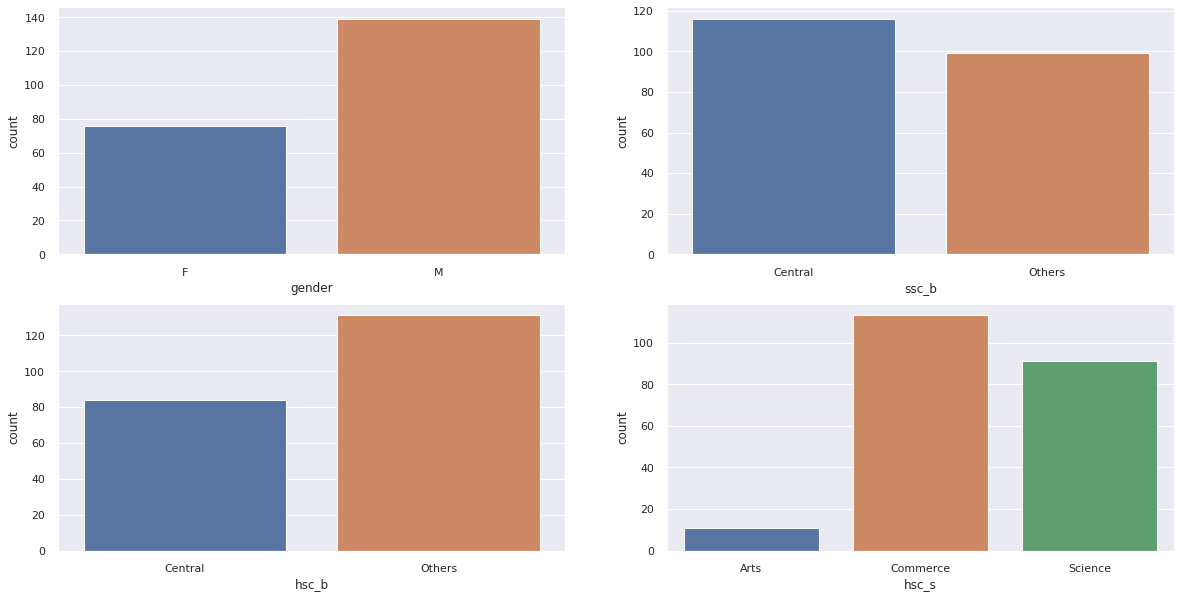

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(col1, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)

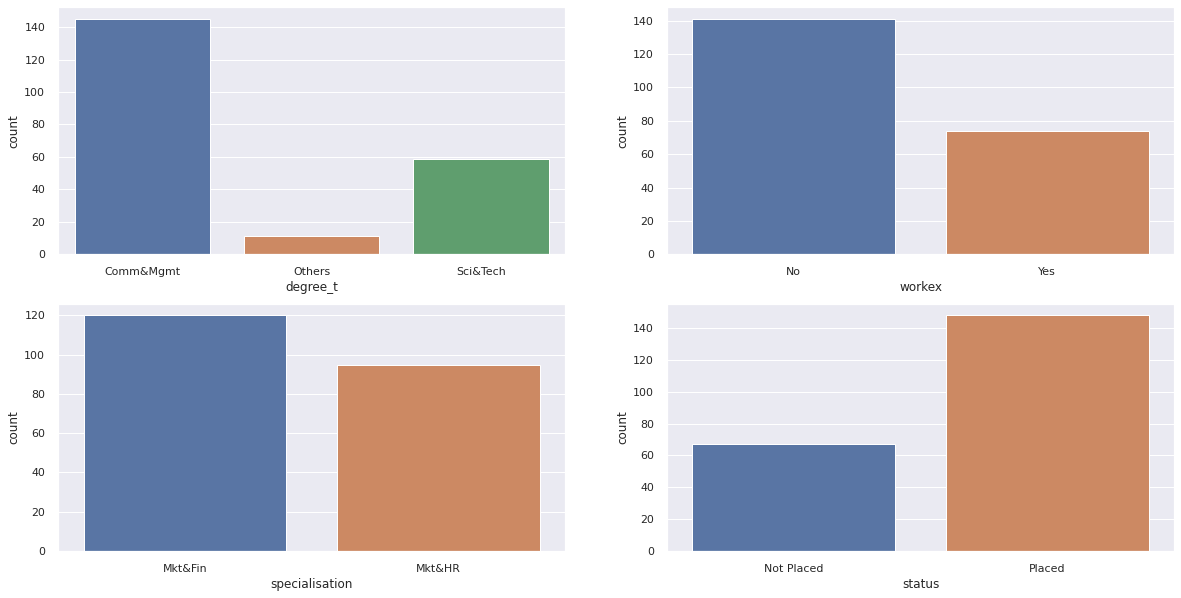

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(col2, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)

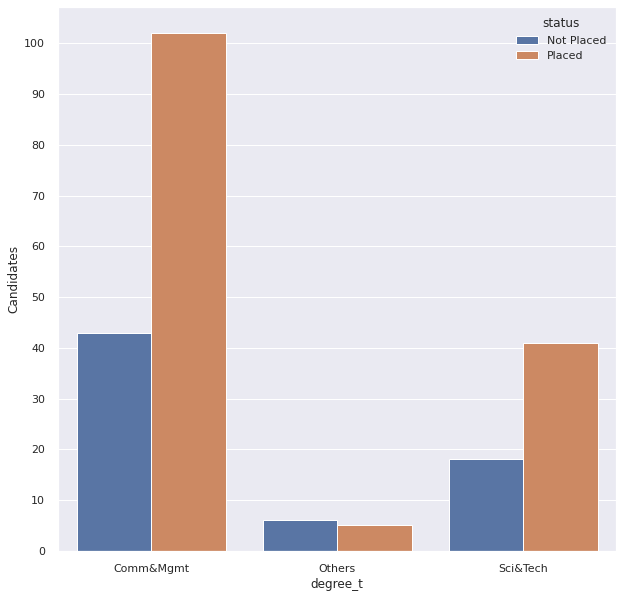

In [ ]:
plt.figure(figsize=(10,10))

sns.countplot(x='degree_t',hue='status',data=df)
plt.ylabel('Candidates')
plt.yticks(range(0,110,10))
ax=plt.gca()

#Berdasarkan hasil visualisasi terlihat bahwa kandidat yang mendapat pekerjaan maoyritas mengambil jurusan comm&mgmt
#Kemungkinan mendapatkan pekerjaan lebih besar untuk kandidat yang mengambil comm&mgmt dan Sci&Tech dibanding jurusan lainnya

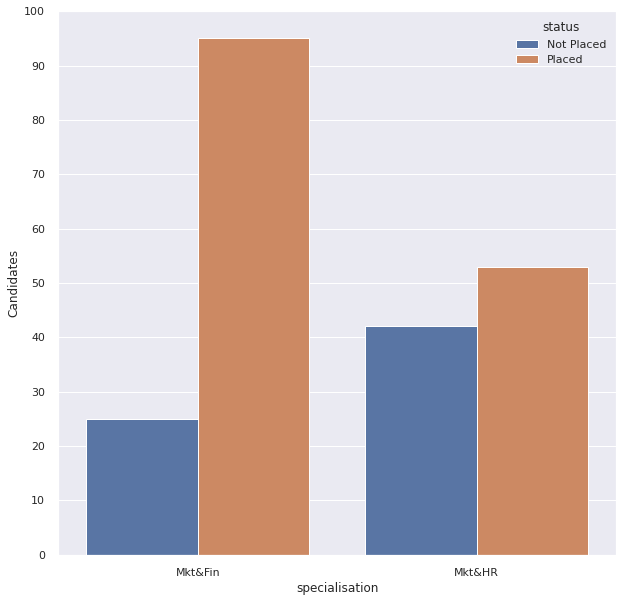

In [ ]:
plt.figure(figsize=(10,10))

sns.countplot(x='specialisation',hue='status',data=df)
plt.ylabel('Candidates')
plt.yticks(range(0,110,10))
ax=plt.gca()

#Berdasarkan visualisasi terlihat bahwa spesialisasi Mkt&Fin cenderung memiliki kemungkinan mendapatkan kerja lebih besar dibanding spesialisasi Mkt&HR

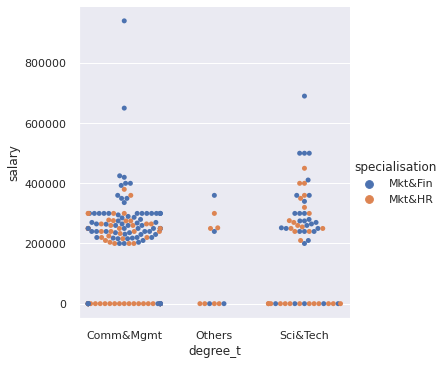

In [ ]:
p= sns.catplot(x="degree_t", y="salary", hue="specialisation", kind="swarm", data=dff)

#Berdasarkan hasil visualisasi dapat dilihat bahwa terdapat 2 outlier di jurusan comm&mgmt dengan spesialisasi Mkt&Fin
#Outlier juga ditemukan di jurusan sci&Tech dengan spesialisasi Mkt&Fin
#Secara keseluruhan terlihat tidak terdapat perbedaan siginifkan pada gaji antar kedua spesialisasi di ketiga jurusan 
#Terlihat bahwa sepsialisasi Mkt&Fin memiliki beberapa outlier yang membuat gaji pada Mkt&Fin terkesan lebih tinggi

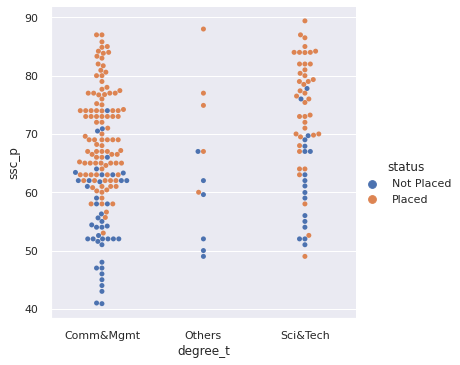

In [ ]:
p= sns.catplot(x="degree_t", y="ssc_p", hue="status", kind="swarm", data=dff)

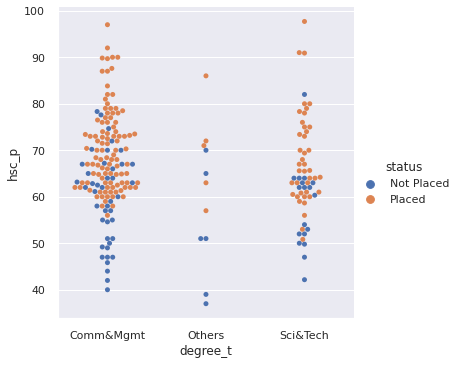

In [ ]:
p= sns.catplot(x="degree_t", y="hsc_p", hue="status", kind="swarm", data=dff)

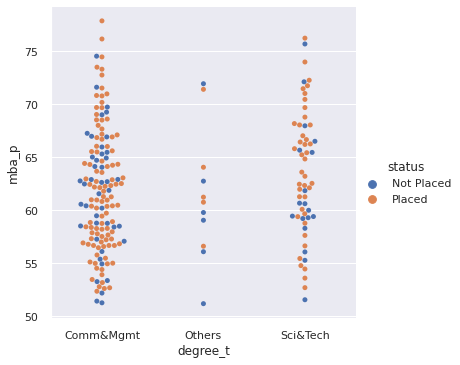

In [ ]:
p= sns.catplot(x="degree_t", y="mba_p", hue="status", kind="swarm", data=dff)

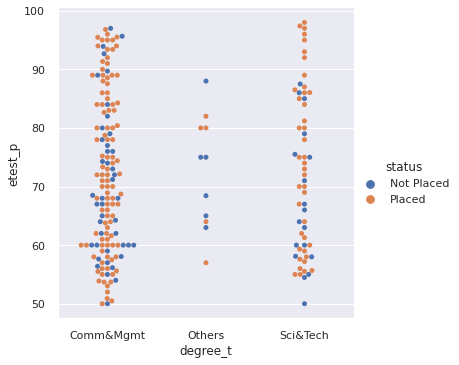

In [ ]:
p= sns.catplot(x="degree_t", y="etest_p", hue="status", kind="swarm", data=dff)

#Berdasarkan visualisasi terlihat tidak ada perbedaan kemungkinan penerimaan kerja pada ketiga jurusan berdasarkan nilai Employment Test dari kampus
#Maka  dapat dikatakan nilai Employment Test tidak siginifikan untuk penentuan status penempatan kerja

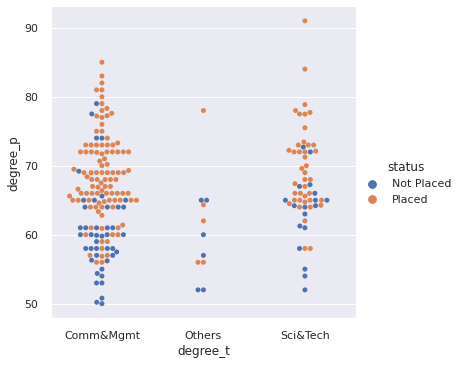

In [ ]:
p= sns.catplot(x="degree_t", y="degree_p", hue="status", kind="swarm", data=dff)

#Berdasarkan hasil visualisasi dapat dikatakan bahwa mahasiswa yg memiliki degree_p dibawah 55 cenderung tidak mendapat pekerjaan
#Dapat dilihat juga bahwa semakin tinggi nilai degree_p maka cenderung semakin besar kemungkinan seseorang mendapatkan pekerjaan
#Terdapat outlier di jurusan sci&Tech dan jurusan lain dimana ada mahasiswa yg memiliki degree_p sangat tinggi

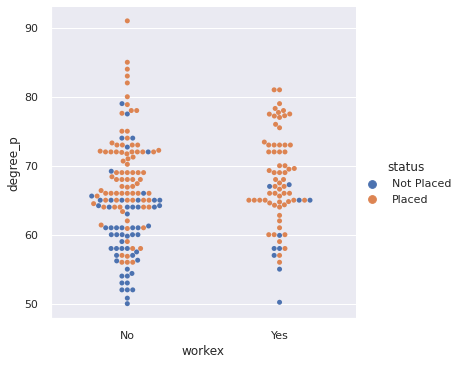

In [ ]:
p= sns.catplot(x="workex", y="degree_p", hue="status", kind="swarm", data=dff)

#Berdasarkan hasil visualisasi dapat dikatakan bahwa orang yang memiliki nilai degree_p diatas rata2 (66,37) memiliki peluang mendapat kerja lebih tinggi walaupun tidak memiliki pengalaman bekerja
#Mahasiswa yang memiliki pengalaman kerja cenderung berpeluang lebih besar untuk mendapat pekerjaan

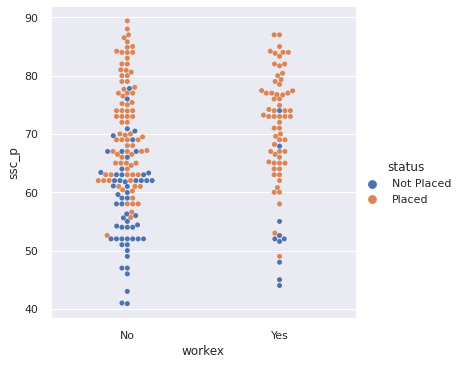

In [ ]:
p= sns.catplot(x="workex", y="ssc_p", hue="status", kind="swarm", data=dff)

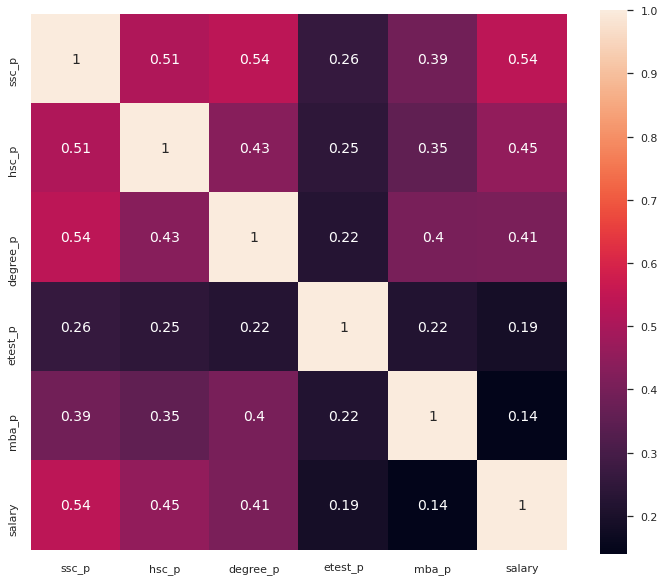

In [ ]:
corr = df_num.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cbar=True, annot=True, annot_kws={"size": 14}, square=True);


## Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df_num)
print (x_scaled)

[[0.53823954 0.88962109 0.19512195 0.10416667 0.28448276 0.28723404]
 [0.79241394 0.68088962 0.6702439  0.76041667 0.56484258 0.21276596]
 [0.49701093 0.5107084  0.34146341 0.52083333 0.2470015  0.26595745]
 ...
 [0.53823954 0.49423394 0.56097561 0.1875     0.69377811 0.31382979]
 [0.68253968 0.47775947 0.19512195 0.41666667 0.33808096 0.21702128]
 [0.43516801 0.34596376 0.07317073 0.8125     0.33770615 0.        ]]


Text(0.5, 1.0, 'Elbow curve')

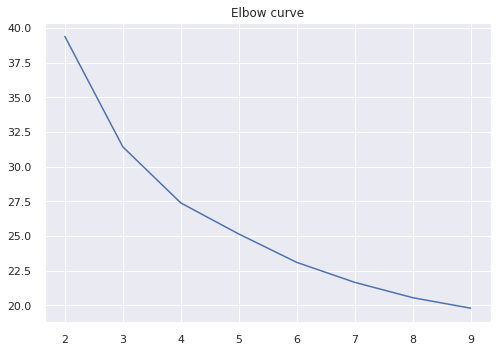

In [ ]:
distorsions, k1, kN = [], 2,10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(x_scaled)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

#Berdasarkan elbow method, kemungkinan cluster akan baik jika dipilih antara 3,4 atau 5.

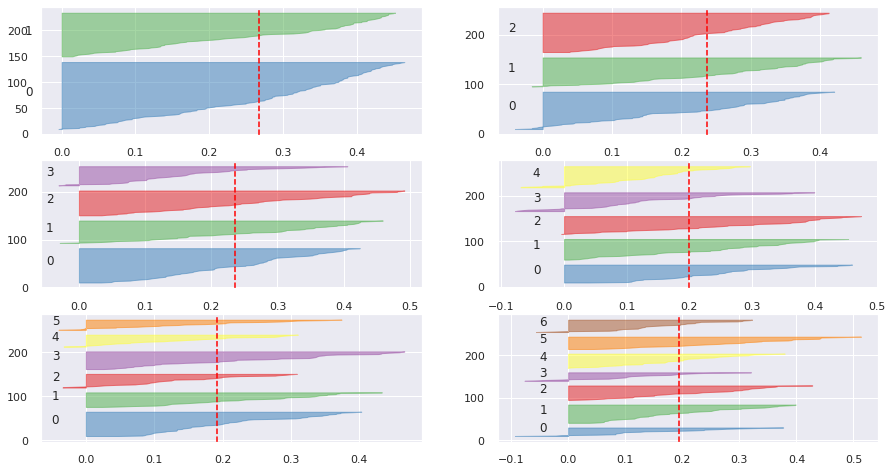

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x_scaled)

    #Berdasarkan proporsinya, jumlah cluster 2,3,4 memiliki proporsi yang cukup bagus.
    #Pada penelitian ini, kelompok kami memutuskan menggunakan jumlah cluster 4

In [ ]:
kmeans_4 = KMeans(n_clusters = 4,random_state = 123) #4 Cluster
kmeans_4.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [ ]:
C_km=kmeans_4.predict(x_scaled)

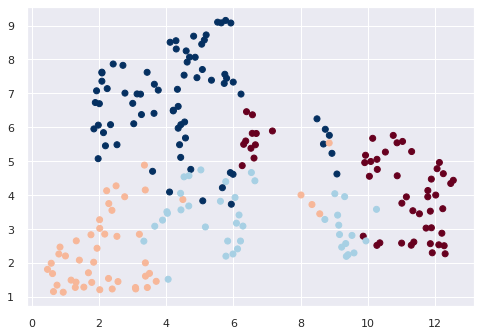

In [ ]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=99).fit_transform(x_scaled)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_km, cmap =('RdBu'))
plt.show()

#Terdapat 4 cluster yang dibedakan oleh 4 warna

In [ ]:
kmeansminipp = cluster.MiniBatchKMeans(n_clusters = 4,init='k-means++',random_state = 123)
kmeansminipp.fit(x_scaled)
C_kmmpp=kmeansminipp.predict(x_scaled)

In [ ]:
kmeansminipp.cluster_centers_

array([[0.76771224, 0.62746485, 0.52871809, 0.80274709, 0.6357179 ,
        0.28542801],
       [0.29394603, 0.31388351, 0.2191542 , 0.40571434, 0.29579321,
        0.03223044],
       [0.60183275, 0.51279053, 0.4422948 , 0.23050336, 0.43354875,
        0.25813797],
       [0.51240823, 0.48712204, 0.40280425, 0.62772436, 0.27000538,
        0.30623568]])

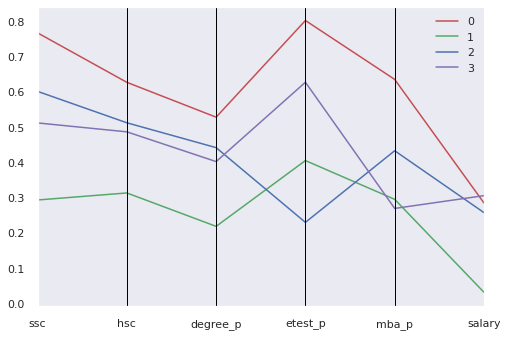

In [ ]:
cols = ['ssc','hsc','degree_p','etest_p','mba_p','salary']
dfC = pd.DataFrame(kmeansminipp.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b','m'))
plt.show()

#Cluster 0 adalah cluster untuk mahasiswa yang memiliki nilai etest_p tertinggi
#Cluster 1 adalah cluster untuk mahasiswa dengan gaji terendah
#Cluster 2 adalah cluster untuk mahasiswa dengan nilai etest_p terendah
#Cluster 3 adalah cluster untuk mahasiswa dengan nilai mba_p terendah

In [ ]:
dfC

,ssc,hsc,degree_p,etest_p,mba_p,salary,cluster
0,0.767712,0.627465,0.528718,0.802747,0.635718,0.285428,0
1,0.293946,0.313884,0.219154,0.405714,0.295793,0.032230,1
2,0.601833,0.512791,0.442295,0.230503,0.433549,0.258138,2
3,0.512408,0.487122,0.402804,0.627724,0.270005,0.306236,3


* Cluster 0 adalah cluster untuk mahasiswa yang memiliki nilai etest_p tertinggi
* Cluster 1 adalah cluster untuk mahasiswa dengan gaji terendah
* Cluster 2 adalah cluster untuk mahasiswa dengan nilai etest_p terendah
* Cluster 3 adalah cluster untuk mahasiswa dengan nilai mba_p terendah

#Pemodelan

## Klasifikasi

### Support Vector Machine

In [ ]:
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [ ]:
X_trains, X_tests, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
print(X_trains.shape, X_tests.shape, len(y_test))

sc = StandardScaler()
X_train = sc.fit_transform(X_trains)
X_test = sc.transform(X_tests)

svmLinear= svm.SVC(kernel='linear', C=1)
svmLinear.fit(X_train, y_train)
y_train2 = svmLinear.predict(X_train)
y_pred = svmLinear.predict(X_test)
print('acc train' + str(accuracy_score(y_train, y_train2)))
print('acc test' + str(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(cross_val_score(svmLinear, X_train, y_train, cv=10))

(129, 14) (86, 14) 86
acc train0.8604651162790697
acc test0.9302325581395349
[[22  4]
 [ 2 58]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.94      0.97      0.95        60

    accuracy                           0.93        86
   macro avg       0.93      0.91      0.92        86
weighted avg       0.93      0.93      0.93        86

[0.76923077 0.84615385 0.92307692 0.69230769 0.76923077 0.84615385
 0.69230769 0.92307692 0.69230769 0.83333333]


In [ ]:
X_trains, X_tests, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
print(X_trains.shape, X_tests.shape, len(y_test))

sc = StandardScaler()
X_train = sc.fit_transform(X_trains)
X_test = sc.transform(X_tests)

svmLinear10= svm.SVC(kernel='linear', C=10)
svmLinear10.fit(X_train, y_train)
y_train2 = svmLinear10.predict(X_train)
y_pred = svmLinear10.predict(X_test)
print('acc train' + str(accuracy_score(y_train, y_train2)))
print('acc test' + str(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(cross_val_score(svmLinear10, X_train, y_train, cv=10))

(129, 14) (86, 14) 86
acc train0.875968992248062
acc test0.9186046511627907
[[21  5]
 [ 2 58]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        26
           1       0.92      0.97      0.94        60

    accuracy                           0.92        86
   macro avg       0.92      0.89      0.90        86
weighted avg       0.92      0.92      0.92        86

[0.76923077 0.84615385 1.         0.69230769 0.76923077 0.84615385
 0.69230769 0.92307692 0.76923077 0.83333333]


parameter terbaik didapatkan adalah C=1

### SVM dengan SMOTE

In [ ]:
# borderline-SMOTE with SVM for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SVMSMOTE()
X_baru, y_baru = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_baru)
print(counter)

Counter({1: 148, 0: 67})
Counter({1: 148, 0: 148})


In [ ]:
X_baru

array([[67.        , 91.        , 58.        , ...,  1.        ,
         0.        ,  0.        ],
       [79.33      , 78.33      , 77.48      , ...,  1.        ,
         1.        ,  1.        ],
       [65.        , 68.        , 64.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [65.22851495, 47.75492132, 55.85463021, ...,  1.48806058,
        -0.48806058,  1.        ],
       [52.        , 50.00676054, 61.02028163, ...,  0.        ,
         0.        ,  1.00676054],
       [50.23056865, 48.01698259, 58.24575435, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
X_trains, X_tests, y_train_baru, y_test_baru = train_test_split(X_baru, y_baru, test_size=0.4, random_state=1)
print(X_trains.shape, X_tests.shape, len(y_test))

sc = StandardScaler()
X_train_baru = sc.fit_transform(X_trains)
X_test_baru = sc.transform(X_tests)

svmLinear1= svm.SVC(kernel='linear', C=1)
svmLinear1.fit(X_train_baru, y_train_baru)
y_train2 = svmLinear1.predict(X_train_baru)
y_pred = svmLinear1.predict(X_test_baru)
print('acc train' + str(accuracy_score(y_train_baru, y_train2)))
print('acc test' + str(accuracy_score(y_test_baru, y_pred)))
print(confusion_matrix(y_test_baru, y_pred))
print(classification_report(y_test_baru, y_pred))
print(cross_val_score(svmLinear1, X_train_baru, y_train_baru, cv=10))
cv_svmSMOTE = cross_val_score(svmLinear1, X_train_baru, y_train_baru, cv=10)

(177, 14) (119, 14) 86
acc train0.8757062146892656
acc test0.907563025210084
[[61  6]
 [ 5 47]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        67
           1       0.89      0.90      0.90        52

    accuracy                           0.91       119
   macro avg       0.91      0.91      0.91       119
weighted avg       0.91      0.91      0.91       119

[0.83333333 0.83333333 0.88888889 0.77777778 0.94444444 0.83333333
 0.83333333 0.88235294 0.82352941 0.82352941]


In [ ]:
svmLinear1.coef_

array([[ 1.6854108 ,  0.40222026,  0.76137156, -0.07061094, -0.83859455,
         0.28607114, -0.1037252 , -0.12057226, -0.30895178, -0.54026284,
        -0.34003745, -0.59285787,  0.60843241,  0.09883667]])

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(svmLinear1)
rfe.fit(X_train_baru,y_train_baru)
rfe.support_

array([ True,  True,  True, False,  True, False, False, False,  True,
        True, False, False,  True, False])

In [ ]:
X.columns[rfe.support_==True]

Index(['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'hse_com', 'hse_sci', 'work_ex'], dtype='object')

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_trains, X_tests, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
print(X_trains.shape, X_tests.shape, len(y_test))

sc = StandardScaler()
X_train = sc.fit_transform(X_trains)
X_test = sc.transform(X_tests)

lr = LogisticRegression(C=1)
lr.fit(X_train, y_train)
y_train2 = lr.predict(X_train)
y_pred = lr.predict(X_test)
print('acc train' + str(accuracy_score(y_train, y_train2)))
print('acc test' + str(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(cross_val_score(lr, X_train, y_train, cv=10))
cv1 = cross_val_score(lr, X_train, y_train, cv=10)

(129, 14) (86, 14) 86
acc train0.8449612403100775
acc test0.9418604651162791
[[22  4]
 [ 1 59]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.94      0.98      0.96        60

    accuracy                           0.94        86
   macro avg       0.95      0.91      0.93        86
weighted avg       0.94      0.94      0.94        86

[0.76923077 0.84615385 0.92307692 0.76923077 0.76923077 0.84615385
 0.69230769 0.92307692 0.76923077 0.83333333]


### Logistic Regression dengan SMOTE

In [ ]:
X_trains, X_tests, y_train_baru, y_test_baru = train_test_split(X_baru, y_baru, test_size=0.4, random_state=1)
print(X_trains.shape, X_tests.shape, len(y_test))

sc = StandardScaler()
X_train_baru = sc.fit_transform(X_trains)
X_test_baru = sc.transform(X_tests)

lr1 = LogisticRegression(C=1)
lr1.fit(X_train_baru, y_train_baru)
y_train2 = svmLinear1.predict(X_train_baru)
y_pred = svmLinear1.predict(X_test_baru)
print('acc train' + str(accuracy_score(y_train_baru, y_train2)))
print('acc test' + str(accuracy_score(y_test_baru, y_pred)))
print(confusion_matrix(y_test_baru, y_pred))
print(classification_report(y_test_baru, y_pred))
print(cross_val_score(lr1, X_train_baru, y_train_baru, cv=10))
cv_lrSMOTE = cross_val_score(lr1, X_train_baru, y_train_baru, cv=10)

(177, 14) (119, 14) 86
acc train0.8757062146892656
acc test0.907563025210084
[[61  6]
 [ 5 47]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        67
           1       0.89      0.90      0.90        52

    accuracy                           0.91       119
   macro avg       0.91      0.91      0.91       119
weighted avg       0.91      0.91      0.91       119

[0.77777778 0.88888889 0.88888889 0.77777778 0.94444444 0.77777778
 0.83333333 0.88235294 0.88235294 0.76470588]


### Kesimpulan Hasil Klasifikasi

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

Akan dibandingkan beberapa model untuk mengklasifikasi data SMOTE dengan parameter default 

Regresi Logistik [0.8333333333333334, 0.8888888888888888, 0.8333333333333334, 0.7777777777777778]
Naive Bayes [0.9444444444444444, 0.7222222222222222, 0.5555555555555556, 0.7777777777777778]
Decision Tree [0.8333333333333334, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888]
Random Forest [0.8888888888888888, 0.9444444444444444, 0.7222222222222222, 0.8333333333333334]
SVM [0.8333333333333334, 0.9444444444444444, 0.8333333333333334, 0.7777777777777778]


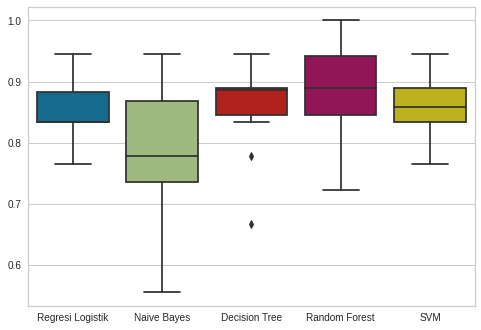

In [ ]:
clf = LogisticRegression(solver='liblinear')
gnb = GaussianNB()
dt = tree.DecisionTreeClassifier()
rf = RandomForestClassifier()
svm_ = svm.SVC()

Models = [('Regresi Logistik', clf), ('Naive Bayes',gnb), ('Decision Tree', dt), ('Random Forest', rf), ('SVM', svm_)]
Scores = {}
for model_name, model in Models:
    Scores[model_name] = cross_val_score(model, X_train_baru, y_train_baru, cv=10, scoring='accuracy')

dt = pd.DataFrame.from_dict(Scores)
ax = sns.boxplot(data=dt)
for m, s in Scores.items():
    print(m, list(s)[:4])

Terlihat bahwa logistic regression dan support vector machine menghasilkan *worst case* hasil akurasi terbaik di antara beberapa model.

Regresi Logistik [0.7777777777777778, 0.8888888888888888, 0.8888888888888888, 0.7777777777777778]
SVM [0.8333333333333334, 0.8333333333333334, 0.8888888888888888, 0.7777777777777778]


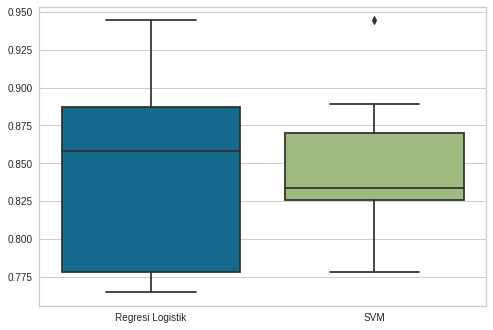

In [ ]:
#Dengan C=1
Models = [('Regresi Logistik', lr1), ('SVM', svmLinear1)]
Scores = {}
for model_name, model in Models:
    Scores[model_name] = cross_val_score(model, X_train_baru, y_train_baru, cv=10, scoring='accuracy')

dt = pd.DataFrame.from_dict(Scores)
ax = sns.boxplot(data=dt)
for m, s in Scores.items():
    print(m, list(s)[:4])

Hasil *cross validation 10-folds* yang terbaik dihasilkan oleh Support vector Machines. Akan dicari *feature importance* dengan *recursive feature elimination*.

In [ ]:
from sklearn.feature_selection import RFE
print(svmLinear1.coef_)
rfe = RFE(svmLinear1)
rfe.fit(X_train_baru, y_train_baru)
rfe.support_
X.columns[rfe.support_==True]

[[ 1.6854108   0.40222026  0.76137156 -0.07061094 -0.83859455  0.28607114
  -0.1037252  -0.12057226 -0.30895178 -0.54026284 -0.34003745 -0.59285787
   0.60843241  0.09883667]]


Index(['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'hse_com', 'hse_sci', 'work_ex'], dtype='object')

In [ ]:
rfe.ranking_

array([1, 1, 1, 8, 1, 2, 7, 5, 1, 1, 4, 3, 1, 6])

In [ ]:
svmLinear1.coef_[0]

array([ 1.6854108 ,  0.40222026,  0.76137156, -0.07061094, -0.83859455,
        0.28607114, -0.1037252 , -0.12057226, -0.30895178, -0.54026284,
       -0.34003745, -0.59285787,  0.60843241,  0.09883667])

In [ ]:
feature_importance = []
for i in range(14):
  a = np.abs((svmLinear1.coef_[0][i]))
  feature_importance.append(a)
feature_importance

[1.6854107959243692,
 0.40222025930044486,
 0.7613715608250955,
 0.07061093618725711,
 0.8385945508090834,
 0.28607113641765813,
 0.10372519907285316,
 0.12057225740670374,
 0.30895177704897936,
 0.5402628361136723,
 0.34003744750542897,
 0.5928578692798798,
 0.6084324063698552,
 0.09883666711440531]

In [ ]:
f_i = pd.DataFrame(feature_importance)
f_i

,0
0,1.685411
1,0.402220
2,0.761372
3,0.070611
4,0.838595
5,0.286071
6,0.103725
7,0.120572
8,0.308952
9,0.540263


In [ ]:
kolom = pd.DataFrame(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'M', 'bse', 'bhse',
       'hse_com', 'hse_sci', 'deg_com', 'deg_sci', 'work_ex',
       'master_jurusan'])

In [ ]:
fitur_penting = pd.concat([kolom, f_i], axis=1)
fitur_penting.columns = ['feature', 'score']

In [ ]:
fitur_penting.head()

,feature,score
0,ssc_p,1.685411
1,hsc_p,0.402220
2,degree_p,0.761372
3,etest_p,0.070611
4,mba_p,0.838595


In [ ]:
 fp = fitur_penting.sort_values(by=['score'], ascending=False)

In [ ]:
fp.iloc[0:7]

,feature,score
0,ssc_p,1.685411
4,mba_p,0.838595
2,degree_p,0.761372
12,work_ex,0.608432
11,deg_sci,0.592858
9,hse_sci,0.540263
1,hsc_p,0.402220


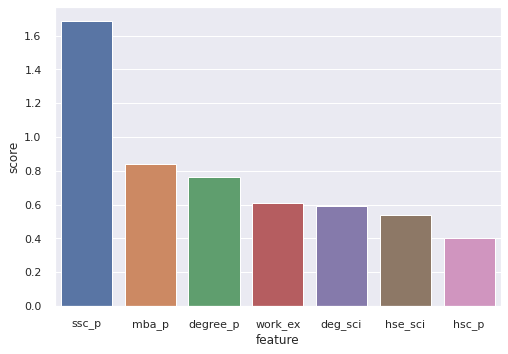

In [ ]:
p = sns.barplot(x='feature', y='score', data=fp.iloc[0:7])

Setelah melakukan *recursive feature elimination* menggunakan model terbaik dari klasifikasi sebelumnya, didapatkan dari SVM *Classifier* bahwa:

Faktor - faktor yang paling mempengaruhi klasifikasi diterima kerja atau tidak adalah sebagai berikut:
* Persentase Nilai setelah lulus dari Secondary Education 10th
* Persentase Nilai setelah lulus dari High Secondary Education 12th
* Persentase Nilai setelah lulus dari Undergraduate Education
* Persentase Nilai setelah lulus dari Master Business Academy
* Peminatan saat 12th grade
* Jurusan yang diambil saat Undergraduate Education
* Pengalaman Kerja
